<a href="https://colab.research.google.com/github/Theflawlessone/Data-Science/blob/main/problem_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

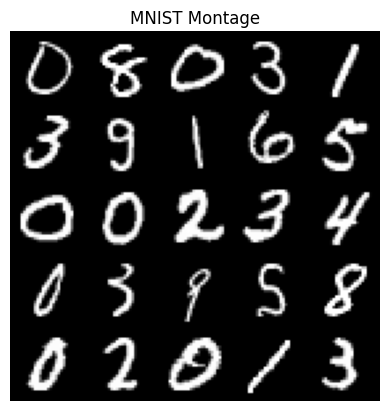

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Define the number of rows and columns for the montage
rows, cols = 5, 5
num_images = rows * cols

# Randomly select num_images from the dataset
indices = np.random.choice(len(x_train), num_images, replace=False)
images = x_train[indices]

# Create a blank canvas for the montage
montage = np.zeros((rows * 28, cols * 28), dtype=np.uint8)

# Fill the montage with the selected images
for i in range(rows):
    for j in range(cols):
        montage[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = images[i * cols + j]

# Display the montage
plt.imshow(montage, cmap='gray')
plt.axis('off')
plt.title("MNIST Montage")
plt.show()


Mean Squared Error: 164751419214320672.00
R-squared: -19647890230502540.00


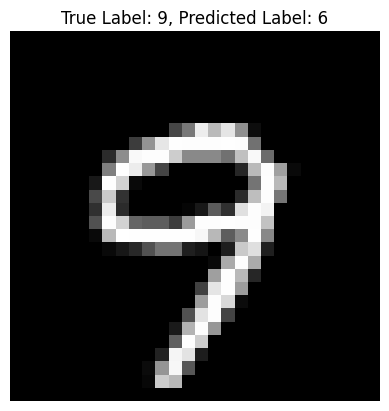

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Choose a random test image
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index].reshape(28, 28)

# Make a prediction on the sample image
sample_pred = model.predict([x_test[sample_index]])

# Plot the sample image and the predicted label
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {y_test[sample_index]}, Predicted Label: {sample_pred[0]:.0f}")
plt.axis('off')
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with softmax activation (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9269 - val_loss: 0.1287 - val_accuracy: 0.9620
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.0941 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9768 - val_loss: 0.0862 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0818 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0736 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0734 - val_accuracy: